<a href="https://colab.research.google.com/github/mascneto/IrisDataSet/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
sns.set()

In [3]:
data = datasets.load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data['data'], columns=data.feature_names)
"""
 Target é a variável que estamos tentando prever quando construímos um modelo de ML.
 O objetivo é que o  modelo seha capaz de prever corretamente a espécie da íris com base nos dados.
"""
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
### Basic descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


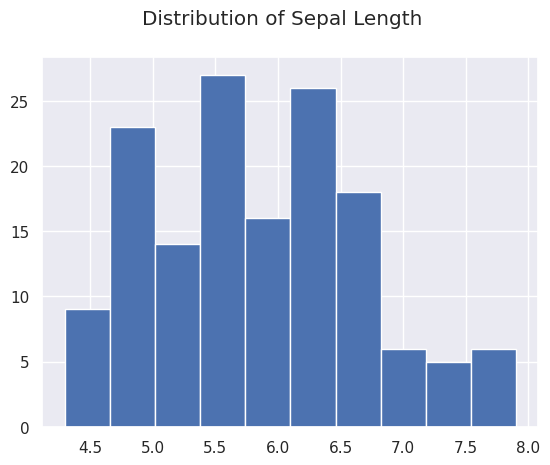

In [9]:
# Distribution of features and targets
df['sepal length (cm)'].hist()
plt.suptitle('Distribution of Sepal Length')
plt.show()

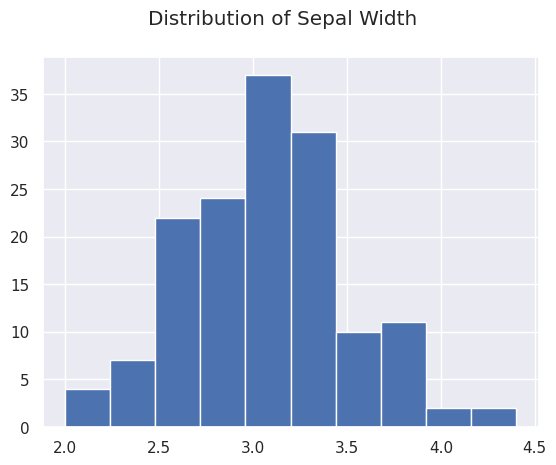

In [10]:
df['sepal width (cm)'].hist()
plt.suptitle('Distribution of Sepal Width')
plt.show()

In [11]:
# Relationship of data features with target
df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Create new columns with species name
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


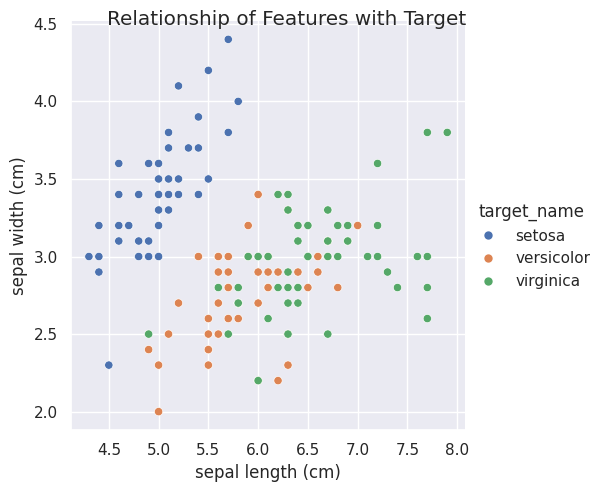

In [12]:
sns.relplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_name', data=df)
plt.suptitle('Relationship of Features with Target')
plt.show()

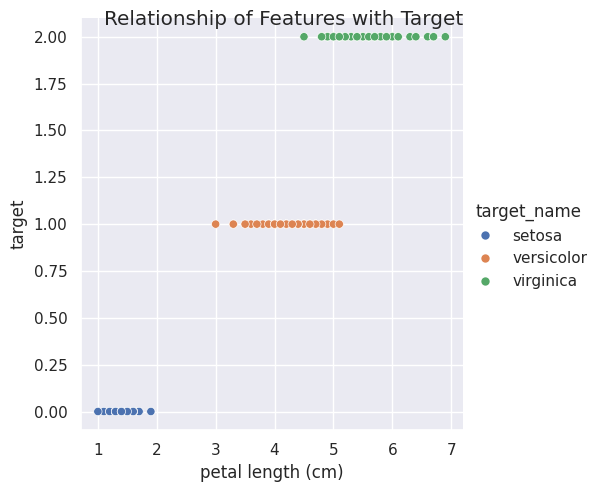

In [13]:
sns.relplot(x='petal length (cm)', y='target', hue='target_name', data=df)
plt.suptitle('Relationship of Features with Target')
plt.show()

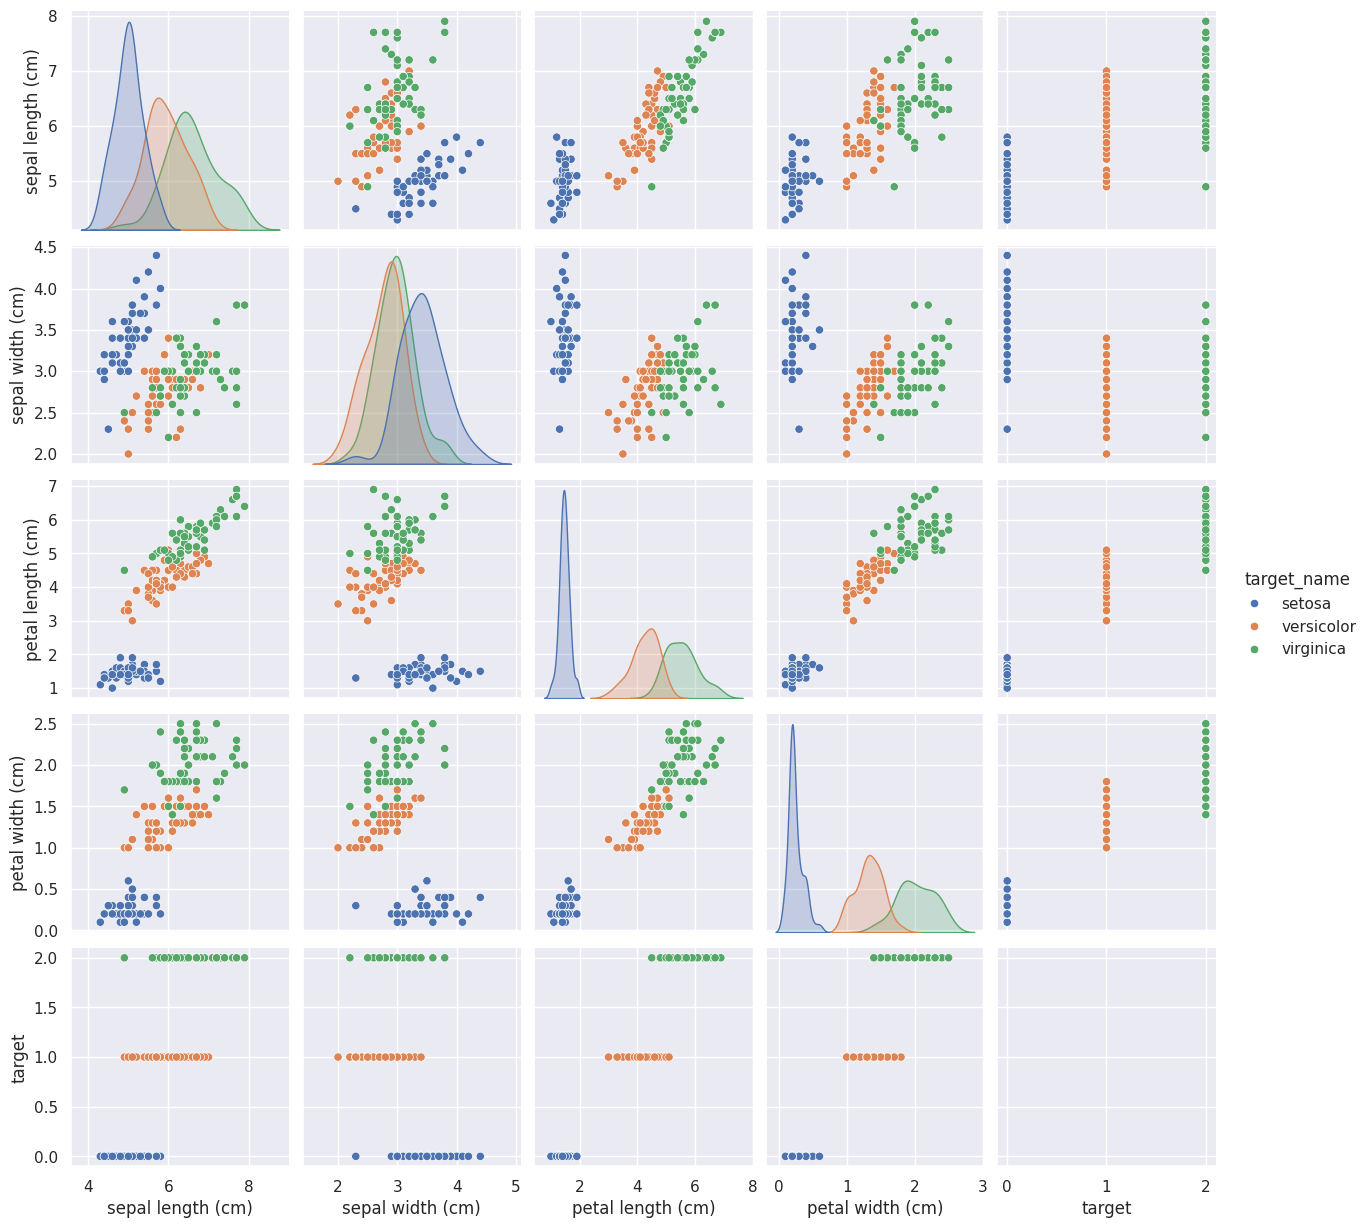

In [14]:
"""
O sns.pairplot cria uma matriz onde cada linha e coluna representa uma variável
e cada célula da matriz representa a correlação entre as variáveis.
"""

sns.pairplot(df, hue='target_name')
plt.show()

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

In [16]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [17]:
print(df_train.shape, df_test.shape)

(112, 6) (38, 6)


In [18]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
8,4.4,2.9,1.4,0.2,0,setosa
108,6.7,2.5,5.8,1.8,2,virginica
48,5.3,3.7,1.5,0.2,0,setosa
112,6.8,3.0,5.5,2.1,2,virginica
35,5.0,3.2,1.2,0.2,0,setosa


In [19]:
# Prepare data for modeling
X_train = df_train.drop(['target', 'target_name'], axis=1).values # exclui as colunas (axis=1) 'target' e 'target_name'; O values transforma num array NumPy
y_train = df_train['target'].values

In [20]:
X_train
y_train

array([0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2,
       2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       2, 2])

In [22]:
from sklearn import linear_model

A classe `LinearRegression` é  usada para ajustar uma reta (ou hiperplano) que minimiza os **erros quadráticos** entre os valores reais e os valores preditos.


In [27]:
reg = linear_model.LinearRegression() # cria uma instância do modelo de Regressão Linear
reg.fit(X_train, y_train)

LinearRegression()